# **ETZOL Léah**
M2 - group Data Engineering 2 (DE2)
## Machine Learning in Production

In [1]:
try : 
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf. keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt

c:\Users\Leah\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


Import the Fashion Mnist data set.  
Load train and test images and labels. 

In [3]:
(train_images, train_labels),(test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

The images are 28 x 28 arrays.

In [4]:
print("Shape example: ",train_images[0].shape)

Shape example:  (28, 28)


Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Before training the model, explore the data (Number of train and test points, their array size and etc.)

In [6]:
print("Number of train points", len(train_images))
print("Shape of train dataset", train_images.shape)
print("Number of test points", len(test_images))
print("Shape of test dataset", test_images.shape)

Number of train points 60000
Shape of train dataset (60000, 28, 28)
Number of test points 10000
Shape of test dataset (10000, 28, 28)


To verify that the data is in the correct format and that we’re ready to build and train the network, let’s display the first 25 images from the training set and display the class name below each image.

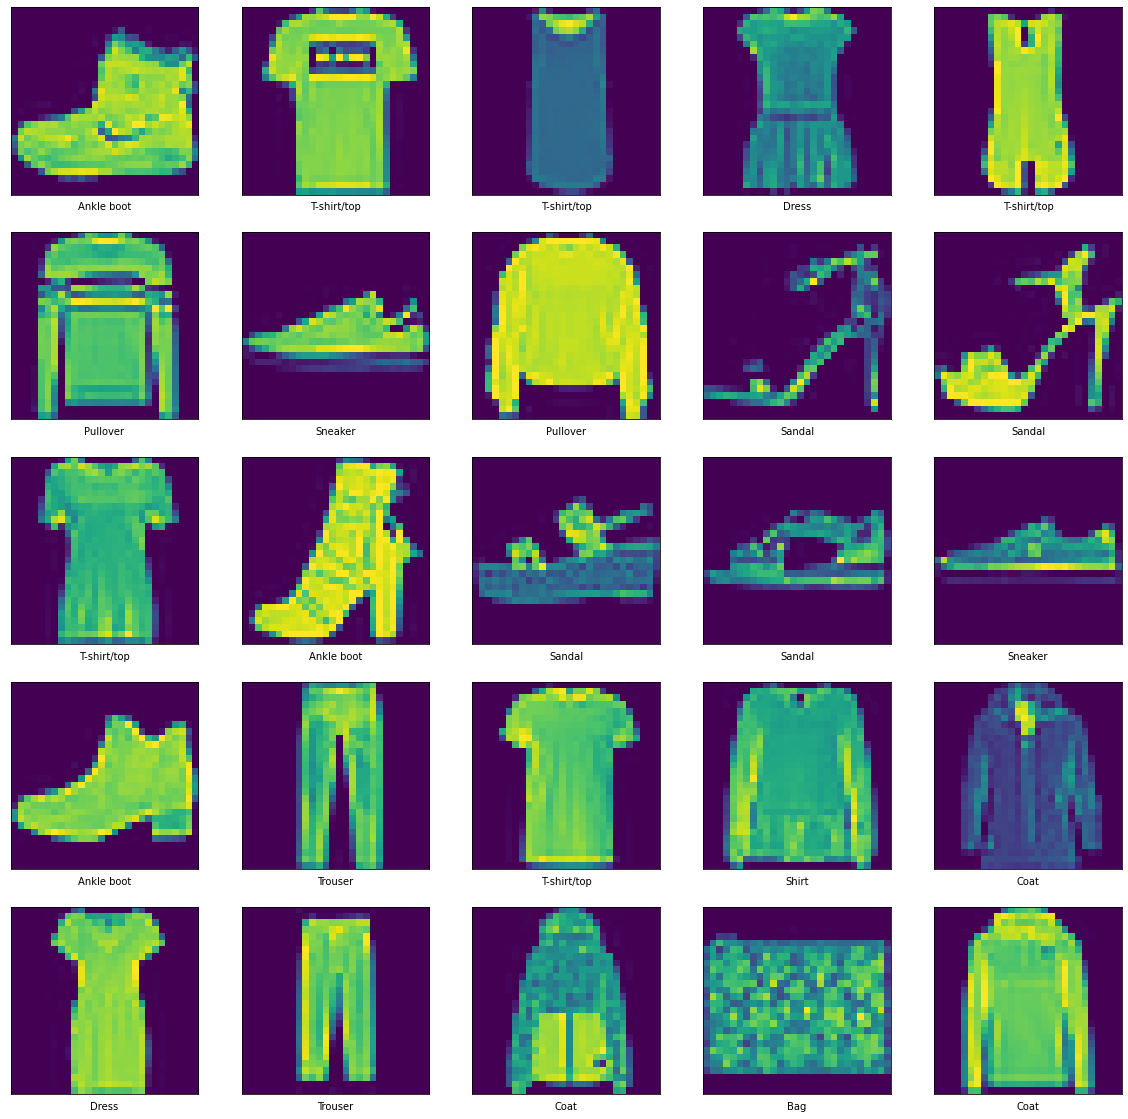

In [7]:
plt.figure(figsize=(20,20))
for index in range (25) : 
  plt.subplot(5,5,index+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[index])
  plt.xlabel(class_names[train_labels[index]])

plt.show()

You can check various images by changing the index value, or by calling test images. You can see that the pixel values fall in the range of 0 to 255.

Let's normalise train and test sets.

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

First neural network definition with three layers and two activation functions

In [9]:
model = keras.Sequential([
  keras.layers.Flatten( input_shape =(28 , 28)) ,
  keras.layers.Dense(128, activation="relu") ,
  keras.layers.Dense(10, activation="softmax") ])

Before the model is ready for training, it needs a few more settings. These are added during the model’s compile step.

In [10]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Train the model: Training the neural network model requires the following steps:

• Feed the training data to the model. In this example, the training data is in the train images and train labels arrays.

• The model learns to associate images and labels.

• You ask the model to make predictions about a test set, in this example, the test images array. Verify that the predictions match the labels from the test labels array.

In [11]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4967 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3734 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3348 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3137 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2918 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2801 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2686 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2482 - accuracy: 0.9081
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [12]:
model.save('model.h5')

In [13]:
keras.models.load_model("model.h5")

Evaluate Accuracy: It is the moment for checking the model performance on the test dataset.

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3382 - accuracy: 0.8826 - 555ms/epoch - 2ms/step


Make predictions : With the model trained, we can use it to make predictions about some images.

In [15]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


Print the first, second and third element of the predicted test sets.

In [16]:
print("Elements of the predicted test sets: \n")
print("1.\n",predictions[0])
print("2.\n",predictions[1])
print("3.\n",predictions[2])

Elements of the predicted test sets: 

1.
 [6.5275333e-07 2.8048666e-05 5.4233487e-06 9.5720530e-08 2.5339821e-06
 2.5593597e-03 8.8788249e-05 3.5589568e-02 2.4317541e-07 9.6172523e-01]
2.
 [4.2295363e-04 1.2182900e-17 9.9822444e-01 1.2283648e-10 1.0474189e-03
 3.1253673e-11 3.0518876e-04 4.5719808e-17 9.7614619e-09 1.4763362e-18]
3.
 [2.85182207e-08 1.00000000e+00 2.62922149e-12 4.12669676e-10
 1.00378435e-10 1.77416141e-19 5.02253898e-11 2.17811196e-21
 7.19858946e-14 1.64399340e-21]


In [17]:
np.argmax(predictions)

21

Write a function for checking the predicted labels. The result should be similar to the above Figure with a label indicating the probability of the predicted label with blue color if the prediction is correct otherwise in the red color?

In [18]:
def plot_image(i, predictions_array, true_label, img):
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = "blue"
  else :
    color = "red"

  plt.xlabel("{} {:2.0f}% {{}}".format(class_names[predicted_label], 
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

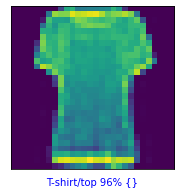

array([9.5969540e-01, 1.8596620e-06, 3.0930635e-06, 1.8633885e-04,
       1.5705975e-08, 3.1358085e-12, 4.0113218e-02, 2.0428942e-18,
       8.0739596e-08, 1.8023505e-13], dtype=float32)

In [19]:
i = 395
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], test_labels[i], test_images[i])
plt.show()
predictions[i]